# Decition Tree - Lab assignments

## Intuitions

In this exercise, you will work with a dataset of animals. You will predict the type of animal base on two features **color** and **height**.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

In [2]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report


data = {
    'color': ['yellow', 'yellow', 'grey', 'yellow', 'grey', 'brown', 'yellow', 'yellow'],
    'height': [12, 12, 10, 5, 10, 3, 12, 5],
    'label': ['Giraffe', 'Giraffe', 'Elephant', 'Tiger', 'Elephant', 'Monkey', 'Giraffe', 'Tiger'],
}
raw_data = pd.DataFrame(data)
raw_data

,color,height,label
0,yellow,12,Giraffe
1,yellow,12,Giraffe
2,grey,10,Elephant
3,yellow,5,Tiger
4,grey,10,Elephant
5,brown,3,Monkey
6,yellow,12,Giraffe
7,yellow,5,Tiger


Before training the model, we will convert the **colors** into dummy variables and the **labels** into numbers:
- **Monkey** becomes **0**
- **Tiger** becomes **1**
- **Elephant** becomes **2**
- **Giraffe** becomes **3**

In [3]:
trained_data = pd.concat([pd.get_dummies(raw_data['color']), raw_data[['height', 'label']]], axis=1)
# trained_data.replace({'label':{'Monkey':0, 'Tiger':1, 'Elephant': 2, 'Giraffe': 3}}, inplace=True)
trained_data

,brown,grey,yellow,height,label
0,0,0,1,12,Giraffe
1,0,0,1,12,Giraffe
2,0,1,0,10,Elephant
3,0,0,1,5,Tiger
4,0,1,0,10,Elephant
5,1,0,0,3,Monkey
6,0,0,1,12,Giraffe
7,0,0,1,5,Tiger


Next, we use `DecisionTreeClassifier` to construct a decition tree:

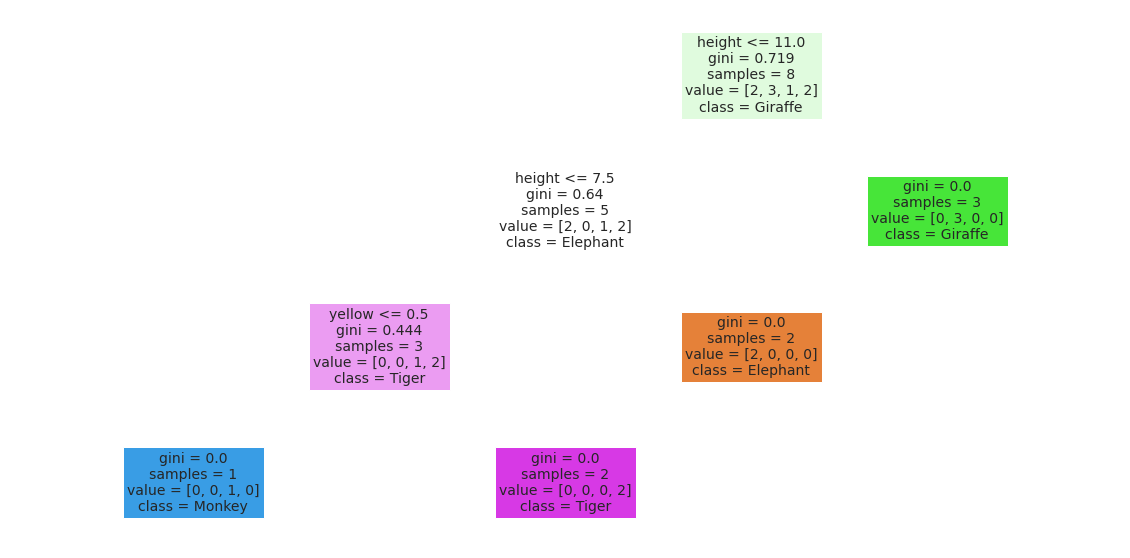

In [4]:
X_train = trained_data[['grey', 'yellow', 'brown', 'height']]
y_train = trained_data['label']
dt = DecisionTreeClassifier(max_depth=3, criterion='gini').fit(X_train, y_train)

plt.figure(figsize=(20,10))
plot_tree(dt, fontsize=14, feature_names=['grey', 'yellow', 'brown', 'height'], filled=True, class_names=dt.classes_)
plt.show()

**Assignments**

- Count the number of leafs of the tree and print it out.
- Print out the depth of the tree.
- Calculate the Gini Score at the root by yourself (using Python).
- Use the classifier `dt` to predict the type of an unseen animal with **height 7** and **color grey**.

In [17]:
# Your code here
dt.get_n_leaves()

4

In [18]:
dt.max_depth

3

In [21]:
size_D = 8
p_k = np.array([2, 3, 1, 2]) / size_D
gini = (p_k * (1 - p_k)).sum()
gini

0.71875

In [23]:
dt.predict([[0, 1, 0, 7]])

array(['Tiger'], dtype=object)

## Decision Tree in classification

In this exercise, we use a penguins dataset.

<table >
<tr>
<td>
<img src="https://i.imgur.com/GK5bRqG.png" width="400px" />
</td>

<td>
<img src="https://i.imgur.com/96gvJNg.png" width="400px" />
</td>
</tr>
</table>


In [6]:
#@title Helper functions

def plot_decision_function(fitted_classifier, range_features, ax=None):
    """Plot the boundary of the decision function of a classifier."""
    from sklearn.preprocessing import LabelEncoder

    feature_names = list(range_features.keys())
    # create a grid to evaluate all possible samples
    plot_step = 0.02
    xx, yy = np.meshgrid(
        np.arange(*range_features[feature_names[0]], plot_step),
        np.arange(*range_features[feature_names[1]], plot_step),
    )

    # compute the associated prediction
    Z = fitted_classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = LabelEncoder().fit_transform(Z)
    Z = Z.reshape(xx.shape)

    # make the plot of the boundary and the data samples
    if ax is None:
        _, ax = plt.subplots()
    ax.contourf(xx, yy, Z, alpha=0.4, cmap="RdBu")

    return ax

**Load the dataset**

In [7]:
%load_ext google.colab.data_table

In [8]:
penguins = pd.read_csv('https://raw.githubusercontent.com/dhminh1024/practice_datasets/master/penguins_classification.csv')
penguins.sample(5)

,Culmen Length (mm),Culmen Depth (mm),Species
78,42.1,19.1,Adelie
193,45.3,13.7,Gentoo
260,48.1,15.1,Gentoo
107,38.1,17.0,Adelie
143,37.3,16.8,Adelie


In [38]:
penguins.shape

(342, 3)

**Split into training and testing dataset**

In [46]:
from sklearn.model_selection import train_test_split

X = penguins[["Culmen Length (mm)", "Culmen Depth (mm)"]]
y = penguins["Species"]
range_features = {
    feature_name: (X[feature_name].min() - 1, X[feature_name].max() + 1)
    for feature_name in X.columns
    }

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

**Train the model**

In [54]:
clf = DecisionTreeClassifier(max_depth=6)
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=6, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

**Plot the decition boundary**

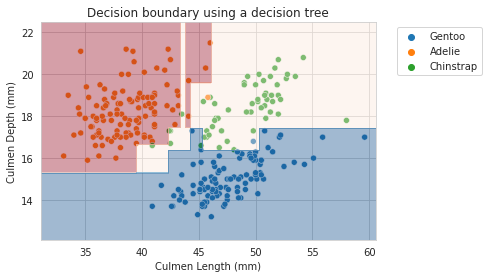

In [55]:
ax = sns.scatterplot(data=pd.concat([X_train, y_train], axis=1), x="Culmen Length (mm)", y="Culmen Depth (mm)", hue="Species")
plot_decision_function(clf, range_features, ax=ax)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Decision boundary using a decision tree")
plt.show()

**Plot the tree**

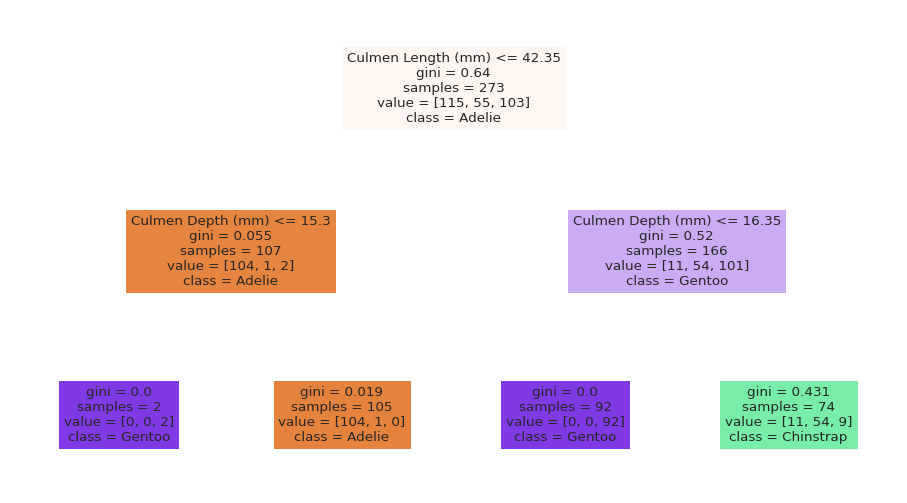

In [49]:
plt.figure(figsize=(16,9))
plot_tree(clf, feature_names=["Culmen Length (mm)", "Culmen Depth (mm)"], filled=True, class_names=clf.classes_)
plt.show()

**Evaluate model accuracy**

In [50]:
predictions = clf.predict(X_test)
print(classification_report(y_test, predictions))

predictions = clf.predict(X_train)
print(classification_report(y_train, predictions))

              precision    recall  f1-score   support

      Adelie       1.00      0.97      0.99        36
   Chinstrap       0.93      1.00      0.96        13
      Gentoo       1.00      1.00      1.00        20

    accuracy                           0.99        69
   macro avg       0.98      0.99      0.98        69
weighted avg       0.99      0.99      0.99        69

              precision    recall  f1-score   support

      Adelie       0.99      0.90      0.95       115
   Chinstrap       0.73      0.98      0.84        55
      Gentoo       1.00      0.91      0.95       103

    accuracy                           0.92       273
   macro avg       0.91      0.93      0.91       273
weighted avg       0.94      0.92      0.93       273



**Assignments**

- Why did the model missclassify all the type Chinstrap?
- Create a decision tree classifier with a maximum depth of 2 levels and fit the training data. Once this classifier trained, plot the data and the decision boundary to see the benefit of increasing the depth.
- Plot the decision boundary.
- Plot the tree using `plot_tree`.
- Evaluate the accuracy score of your tree.

In [28]:
# Your code here

## Hyperparameters of Decision Tree

The hyperparameter `max_depth` controls the overall complexity of a decision tree. This hyperparameter allows to get a trade-off between an under-fitted and over-fitted decision tree.

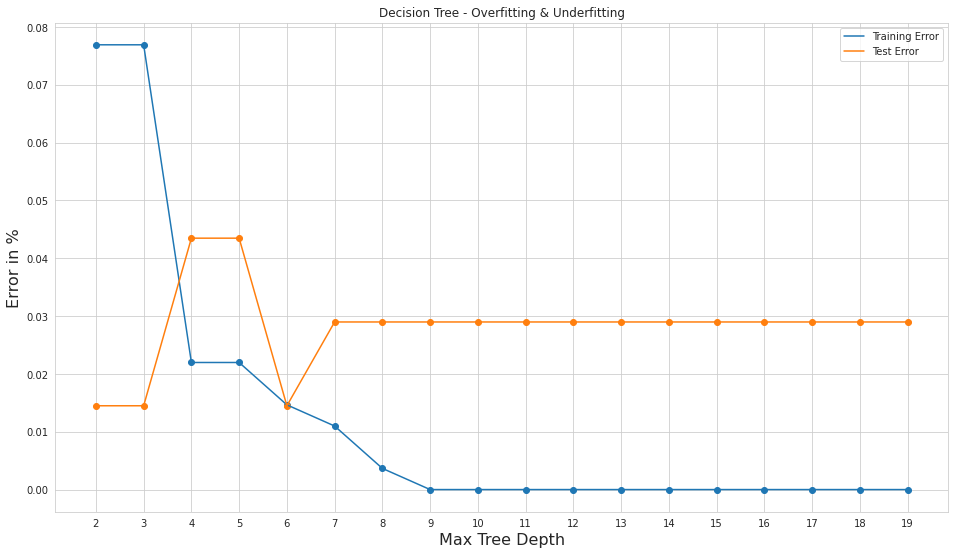

In [57]:
max_depths = np.arange(2, 20)
train_errors = []
test_errors = []
for depth in max_depths:
    dt_clf = DecisionTreeClassifier(max_depth=depth, criterion='entropy').fit(X_train, y_train)
    train_errors.append(1 - accuracy_score(y_train, dt_clf.predict(X_train)))
    test_errors.append(1 - accuracy_score(y_test, dt_clf.predict(X_test)))

plt.figure(figsize=(16, 9))
plt.scatter(max_depths, train_errors)
plt.plot(max_depths, train_errors, label='Training Error')
plt.scatter(max_depths, test_errors)
plt.plot(max_depths, test_errors, label='Test Error')
plt.legend()
plt.title('Decision Tree - Overfitting & Underfitting')
plt.xlabel('Max Tree Depth', fontsize=16)
plt.ylabel('Error in %', fontsize=16)
plt.xticks(max_depths)
plt.show()

**Assignments**

- Analyze the graph above, what is the best `max_depth`? What is the accuracy score of the model with the best `max_depth`?
- The other hyperparameters `min_samples_leaf`, `min_samples_split`, `max_leaf_nodes`, or `min_impurity_decrease` apply a constraint at the leaves or nodes level. Tune the hyperparameters and let's see if you can improve your Decision Tree model.

In [60]:
# Your code here
from sklearn.model_selection import GridSearchCV

parameters = {
    'max_depth': np.arange(1, 10),
    'min_samples_leaf': np.arange(1, 2), 
    'min_samples_split': np.arange(10, 20), 
    # 'max_leaf_nodes':  np.arange(1, 50), 
    # 'min_impurity_decrease': np.arange(0, 0.1, 0.01),
}
dt = DecisionTreeClassifier()
clf = GridSearchCV(dt, parameters)
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'max_depth': array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 

In [61]:
clf.best_params_

{'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 10}